In [27]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
import itertools  
# import sets
import collections as clt
import os
import sys
import difflib as dl  
import re
import timeit
from Input import DataReader, DataSelection
import Plot as pltdat

%reload_ext autoreload

%aimport Input
%aimport Plot

%autoreload 1
%matplotlib inline

# mplt.get_configdir()

In [221]:
mpl.matplotlib_fname()

'/home/mlueckhof/.local/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

Data Input Level
=========
Data input by using methods from class Input

In [2]:
Storage = DataReader(path = ['/home/mlueckhof/Codes/Projects/FCCee/Default/Data/'])
DFseco_col = Storage.readG4out(read = 'secondaries', datType = 'default', verbose = 0)

files are in: ['/home/mlueckhof/Codes/Projects/FCCee/Default/Data/']
 *********************************************** 
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Default/Data/ ...
 subdirectories exist for following optics: 
 ['fcc_ee_t_85_by2_nosol', 'fcc_ee_t_205_nosol', 'fcc_ee_t_208_nosol'] 
 -----------------------------
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Default/Data/fcc_ee_t_85_by2_nosol ...
    ==> no subdirectories.
    ==> found data.
    * beam found:  gauss1
    * no aperture specified
    * beam found:  ring10
    * no aperture specified
    * beam shape: none, set to pencil
    * no aperture specified
    * beam found:  flat5
    * no aperture specified
DatFrame2 appended
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Default/Data/fcc_ee_t_205_nosol ...
    ==> no subdirectories.
    ==> found data.
    * beam found:  gauss1
    * no aperture specified
DatFrame2 appended
 accessing directory: /home/mlueckhof/Codes/Projec

Specify Lattice and Split 
------------------------------

In [5]:
Selection = DataSelection(DFseco_col)
def_opt = Selection.opticsSelection(optics = ['fcc_ee_t_208_nosol'], verbose = 1)
def_opt_split = DataSelection.splitNames(def_opt, verbose = 1) 

-*-*-*-*-*-*-*-*-*-*-*-*-*- 
 Following frame(s) selected: 
 ['fcc_ee_t_208_nosol']
-*-*-*-*-*-*-*-*-*-*-*-*-*- 
 Selected following data frame: def_secondaries
-*-*-*-*-*-*-*-*-*-*-*-*-*- 
 Splitted 'Name' into: 
 ['element', 'type', 'eleNumber', 'vacuum']
*-*-*-*-*-*-*-*-*-*-*-*-* 
 dataframe holds following keys and dtypes: 
 Name            object
Event            int64
Track            int64
x_eu           float64
y_eu           float64
z_eu           float64
ptot           float64
mass             int64
charge           int64
x              float64
y              float64
z              float64
Type             int64
Subtype          int64
ProcName        object
Material        object
Creator         object
trklen         float64
steplen        float64
posVolBound     object
BeamShape       object
BeamSize         int64
CollDim          int64
optics          object
element         object
type            object
eleNumber       object
vacuum          object
dtype: object


Data Visualization Level
==============
At this stage, the data can be plotted using the methods from class VisSRDat

*-*-*-*-*-*-*-*-*-*-*-*-* 
 Available types: {'gauss', 'flat', 'pencil', 'ring'} 
 Available sizes: {0, 1, 10, 5}
Found no collimator frame - analysing default data 
 -----------------------------
Type gauss selected with all sizes.


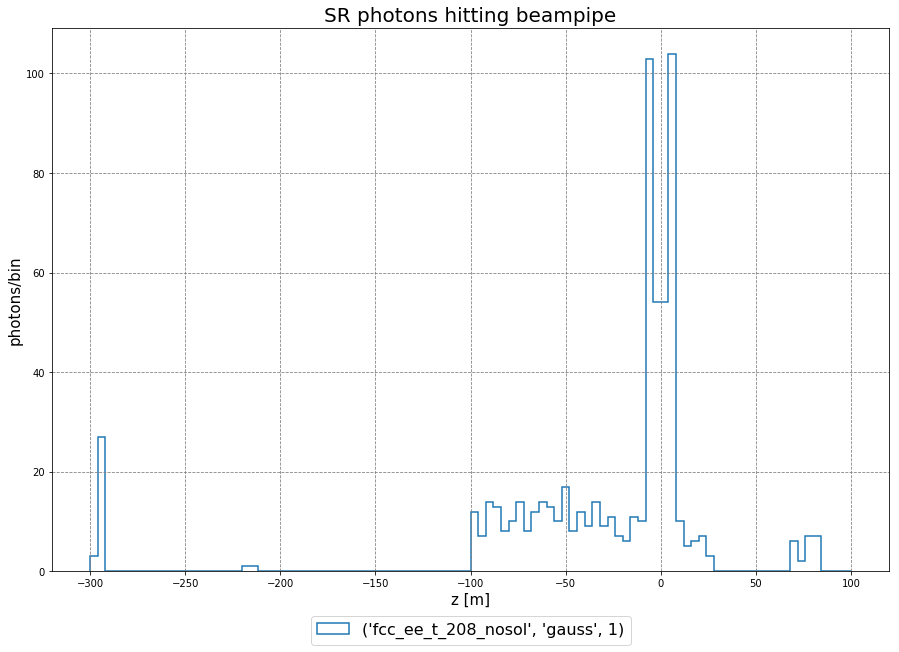

In [30]:
beamTypes, beamSizes = Selection.get_beamShapes_and_Size(verbose = 1)
plotpath = '/home/mlueckhof/temporary/'
pltdat.plot_diffBeamShape(def_opt_split, plotpath, beamTypes, beamSizes, zlim = [], magnet = ['DRIFT'], 
                          Type = 'hit', nBin = 100, beam = ['gauss'], size = 'all', ticks = 50, 
                          verbose = 0, save = 0)

Photon Collimation
=========== 

 *********************************************** 
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Default/Data/
  ==> no sub directories.
  ==> found data
    --> added following files: 
  ['fcc_ee_t_85_by2_nosol_seco_ntuple.out']
 *********************************************** 
 filling data frames
 --> appending file /home/mlueckhof/Codes/Projects/FCCee/Default/Data/fcc_ee_t_85_by2_nosol_seco_ntuple.out ...
done.
 *********************************************** 
 accessing directory: /home/mlueckhof/Codes/Projects/FCCee/Collimator/Data/
  ==> no sub directories.
  ==> found data
    --> added following files: 
  ['fcc_ee_t_85_by2_nosol_coll_3015_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_1030_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_3010_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_2030_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_1530_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_3020_seco_ntuple.out', 'fcc_ee_t_85_by2_nosol_coll_3030_seco_ntuple.out']
 *******

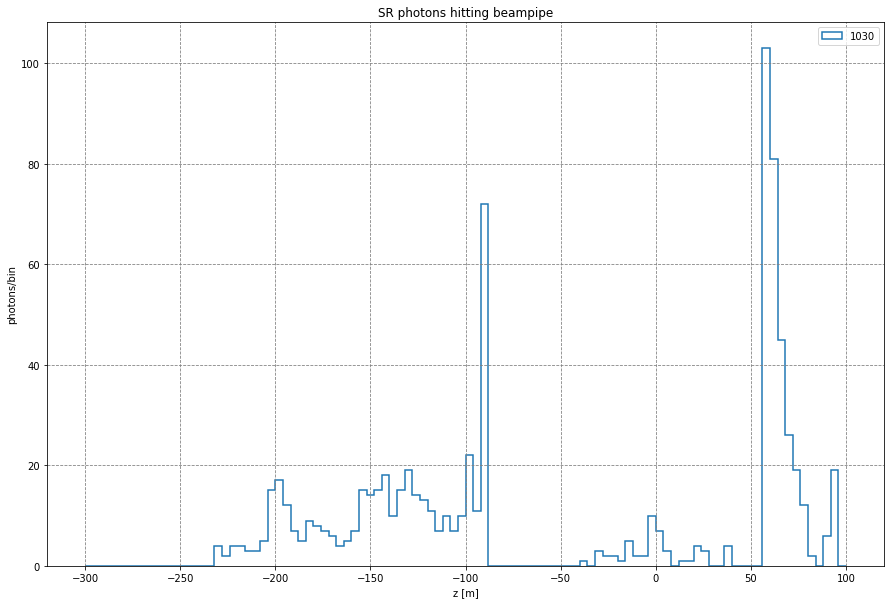

In [18]:
# create the DF's - collimation should be grouped as several cases have to be studied.
#
originSR_col = DataReader(path='/home/mlueckhof/Codes/Projects/FCCee/Collimator/')

# originSR_col = aper_select(originSR_col, aperture = [1030,3030])
# originSR_col.name = 'originSR_col'
# % timeit 
# pltdat.plot_data(originSR_def, Type = 'origin', save = 1)
plotpath = '/home/mlueckhof/Codes/MDI/Analysis_Processing/Analysis/Plots/'
# pltdat.plot_data(originSR_col, Type = 'hit', save = 1, aperture = [3010])
pltdat.plot_data(originSR_col, Type = 'hit', save = 1, aperture = [1030])

SR photons per element
======================

In [19]:
ElementName = 'BWL_2_15037_v'
originSR_Elm = FCCee_secondaries[(FCCee_secondaries.Creator == 'SynRad') & (FCCee_secondaries.charge == 0) &
                                 (FCCee_secondaries.name == ElementName)] 

event_last = 999999999
track_last = 999999999
vis = 1; save = 0 
nBin = 100

Z_org = []; Z_hit = []; E_org = []; E_hit = []; Material = []
for row in originSR_Elm.index:
    event = originSR_Elm.get_value(row,'Event')
    track = originSR_Elm.get_value(row,'Track')
    z_eu  = originSR_Elm.get_value(row,'z_eu')
    mat   = originSR_Elm.get_value(row,'Material')
    energ = originSR_Elm.get_value(row,'ptot')
    if(event_last != event or track_last != track):
        event_last = event
        track_last = track
        Z_org.append(z_eu)
        E_org.append(energ*10**6)
    elif(mat == 'Cu'):
        Z_hit.append(z_eu)
        E_hit.append(energ)

if(vis == 1):
    plt.figure(1)
    plt.title("Origin of SR photons")
    plt.rc('grid', linestyle="--", color='grey')
    plt.grid()
    plt.hist(Z_org, bins = nBin, range = (-550, 0))
    plt.xlabel("z [m]")
    plt.ylabel("photons/bin")
    if(save == 1):
        plt.savefig(plotpath+'SR_origin.pdf')
    else:
        pass

NameError: name 'FCCee_secondaries' is not defined

FCC-ee Parameters
---------------------
The following is just a small function that reads FCCee beam parameters from the xlsx file where they can be easily updated. This tool allows to display and save all or parts of the table as csv. The csv format can then be used within LaTeX if a parameter table is needed.

In [3]:
file = '/home/mlueckhof/PhD/Notes/IRDesign/data/FCCeeParamList.xlsx'
FCCeeParams = DataReader.readParams(file)
FCCeeParams

,parameter,Z,W,H (ZH),ttbar,ttbar.1
0,beam energy [GeV],45.6,80,120,175,182.5
1,arc cell optics,60/60,90/90,90/90,90/90,90/90
2,momentum compaction [E-5],1.48,0.73,0.73,0.73,0.73
3,horizontal emittance [nm],0.27,0.28,0.63,1.34,1.45
4,vertical emittance [pm],1,1,1.3,2.7,2.7
5,horizontal beta* [m],0.15,0.2,0.3,1,1
6,vertical beta* [mm],0.8,1,1,2,2
7,length interaction area [mm],0.42,0.5,0.9,1.95,1.99
8,"tunes, half-ring (x,y,s)","(0.569,0.61,0.0125)","(0.577,0.61,0.0115)","(0.565,0.60,0.0180)","(0.553,0.59,0.0343)","(0.553, 0.59, 0.0350)"
9,longitudinal damping time [ms],414,77,23,7.5,6.6
